In [91]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import pickle

In [43]:
df = quandl.get("WIKI/GOOGL")

In [44]:
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [45]:
df = df[["Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]]

In [47]:
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Close"]) / df["Adj. Close"] * 100.0
df["PCT_change"] = (df["Adj. Close"] - df["Adj. Open"]) / df["Adj. Open"] * 100.0

In [48]:
df = df[["Adj. Close","HL_PCT","PCT_change","Adj. Volume"]]
print(df.head(5))

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [49]:
forecast_col = "Adj. Close"

In [50]:
df.fillna(-99999, inplace=True)

In [51]:
forecast_out = int(math.ceil(0.1*len(df)))

In [52]:
df["label"] = df[forecast_col].shift(-forecast_out)

In [53]:
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume  label
Date                                                            
2018-03-21     1094.00  1.343693    0.130884    1990515.0    NaN
2018-03-22     1053.15  2.921711   -2.487014    3418154.0    NaN
2018-03-23     1026.55  3.918952   -2.360729    2413517.0    NaN
2018-03-26     1054.09  0.491419    0.332191    3272409.0    NaN
2018-03-27     1006.94  5.720301   -5.353887    2940957.0    NaN


In [54]:
df.dropna(inplace=True)

In [55]:
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2016-11-04      781.10  0.944821    1.270582    1970603.0  1094.00
2016-11-07      802.03  0.370310    0.890622    1992570.0  1053.15
2016-11-08      811.98  0.500012    1.240602    1769069.0  1026.55
2016-11-09      805.59  0.759692    0.468927    3098510.0  1054.09
2016-11-10      780.29  3.815248   -3.667901    5909609.0  1006.94


In [56]:
X = np.array(df.drop(["label"],1))
y = np.array(df["label"])
X = preprocessing.scale(X)
y = np.array(df["label"])
print(len(X), len(y))

3081 3081


In [57]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [58]:
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8756563007788063


In [61]:
forecast_out = int(math.ceil(0.01*len(df)))
df["label"] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
X = np.array(df.drop(["label"],1))
y = np.array(df["label"])
X = preprocessing.scale(X)
y = np.array(df["label"])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9628310298423638


In [63]:
clf = svm.SVR()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.818161337797871


In [68]:
clf = svm.SVR(kernel="linear")
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9616103193065964


In [77]:
# next 30 days of unknown stock prices  
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out) 

[781.98459668 782.41587939 798.43661939 798.46874939 791.13302515
 791.99548803 794.98714662 783.78560302 805.25711993 797.69655514
 788.22250718 800.48178606 794.72518262 796.76918349 782.76021205
 782.02740771 771.43683803 783.82935522 779.87730136 797.32301682
 790.99198262 775.66481444 782.73761182 789.22081536 791.10495797
 789.04374122 804.45640817 815.4839778  812.53495987 799.55135048
 781.13232832] 0.9616103193065964 31


In [80]:
df["forecast"] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [82]:
# new dates and forecast values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]    

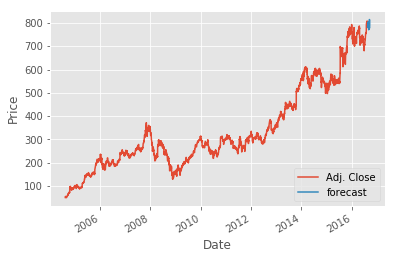

In [90]:
df["Adj. Close"].plot()
df["forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [95]:
# save classifier 
with open("linearregression.pickle","wb") as f:
    pickle.dump(clf, f)

In [97]:
pickle_in = open("linearregression.pickle","rb")
clf = pickle.load(pickle_in)